## POLYNOMIAL REGRESSION : EPA SEA LEVEL

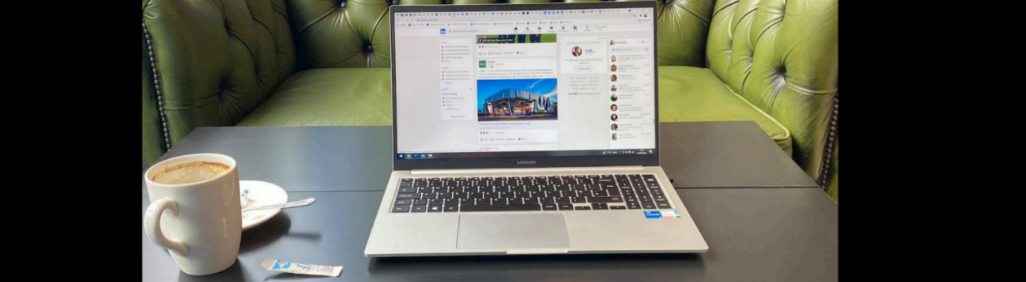

### Hemant Thapa

#### Libraries 

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [52]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module='sklearn')

#### Dataset 

In [53]:
#read the data 
df = pd.read_csv('epa-sea-level.csv')

#### Pre Processing 

In [54]:
df.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


In [55]:
df.tail()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
130,2010,8.901575,8.618110,9.185039,8.122973
131,2011,8.964567,8.661417,9.267717,8.053065
132,2012,9.326772,8.992126,9.661417,8.457058
133,2013,8.980315,8.622047,9.338583,8.546648
134,2014,NaN,NaN,NaN,8.663700


In [56]:
#checking null values
df.isnull().sum()

Year                          0
CSIRO Adjusted Sea Level      1
Lower Error Bound             1
Upper Error Bound             1
NOAA Adjusted Sea Level     113
dtype: int64

#### We have highest missing values in 'NOAA Adjusted Sea Level' columns, we are going to drop this columns.

In [57]:
#drop rows with missing values in 'CSIRO Adjusted Sea Level'
df.drop('NOAA Adjusted Sea Level', axis=1, inplace=True)

In [58]:
#checking total null values
df.isnull().sum().sum()

3

In [59]:
# #iterate through each column and fill missing values with the column's median
# for column in df.columns:
#     #if the column contains missing values
#     if df[column].isnull().sum() > 0:  
#         #the median of the column
#         median = df[column].median()  
#         #fill missing values with the column's median
#         df[column].fillna(median, inplace=True)  

In [62]:
#remove any leading/trailing spaces in column names if present
df.columns = df.columns.str.strip()
#forward fill missing values in all columns 
df = df.ffill()

In [64]:
df.loc[130:134]

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound
130,2010,8.901575,8.618110,9.185039
131,2011,8.964567,8.661417,9.267717
132,2012,9.326772,8.992126,9.661417
133,2013,8.980315,8.622047,9.338583
134,2014,8.980315,8.622047,9.338583


In [65]:
#statical analysis
df.describe()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound
count,135.000000,135.000000,135.000000,135.000000
mean,1947.000000,3.689822,3.244794,4.134850
std,39.115214,2.518529,2.694470,2.347703
min,1880.000000,-0.440945,-1.346457,0.464567
25%,1913.500000,1.659449,1.118110,2.251969
50%,1947.000000,3.374016,2.996063,3.751968
75%,1980.500000,5.673228,5.421260,5.925197
max,2014.000000,9.326772,8.992126,9.661417


In [66]:
df[:5]

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound
0,1880,0.000000,-0.952756,0.952756
1,1881,0.220472,-0.732283,1.173228
2,1882,-0.440945,-1.346457,0.464567
3,1883,-0.232283,-1.129921,0.665354
4,1884,0.590551,-0.283465,1.464567


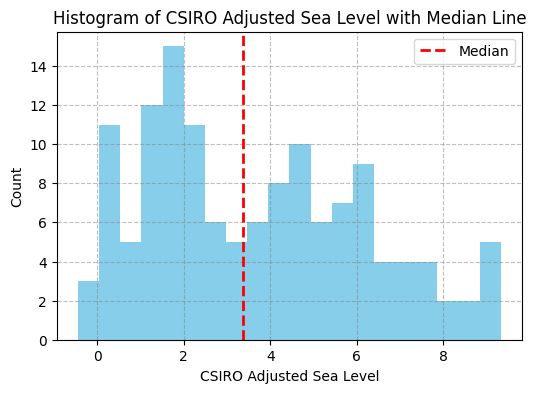

In [67]:
plt.figure(figsize=(6, 4))
plt.hist(df['CSIRO Adjusted Sea Level'],bins=20, color='skyblue')
plt.axvline(np.median(df['CSIRO Adjusted Sea Level']), color='red', linestyle='dashed', linewidth=2, label='Median')
plt.xlabel('CSIRO Adjusted Sea Level')
plt.ylabel('Count')
plt.title('Histogram of CSIRO Adjusted Sea Level with Median Line')
plt.legend()
plt.grid(True, ls='--', color='grey', alpha=0.5)
plt.show()

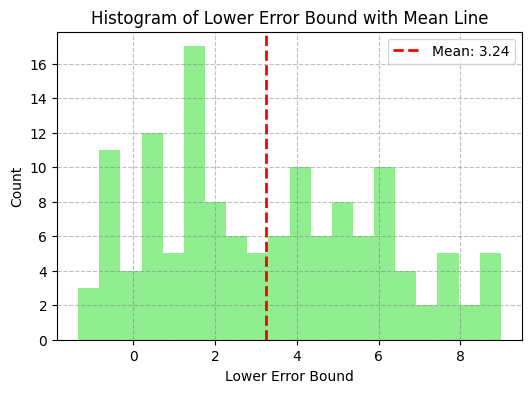

In [68]:
plt.figure(figsize=(6, 4))
plt.hist(df['Lower Error Bound'], bins=20, color='lightgreen')
plt.grid(True, ls='--', color='grey', alpha=0.5)
mean_lower_error_bound = df['Lower Error Bound'].mean()
plt.axvline(mean_lower_error_bound, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_lower_error_bound:.2f}')
plt.xlabel('Lower Error Bound')
plt.ylabel('Count')
plt.title('Histogram of Lower Error Bound with Mean Line')
plt.legend()
plt.show()

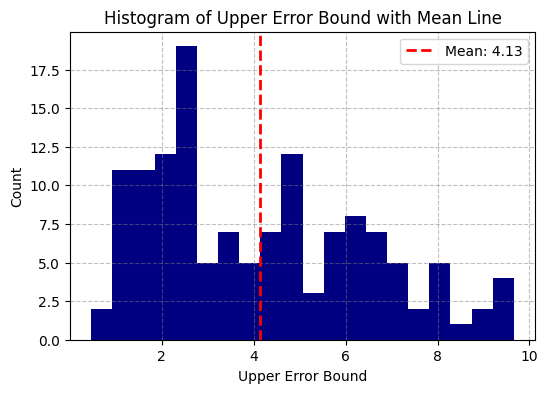

In [69]:
plt.figure(figsize=(6, 4))
plt.hist(df['Upper Error Bound'], bins=20, color='navy')
plt.grid(True, ls='--', color='grey', alpha=0.5)
mean_upper_error_bound = df['Upper Error Bound'].mean()
plt.axvline(mean_upper_error_bound, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_upper_error_bound:.2f}')
plt.xlabel('Upper Error Bound')
plt.ylabel('Count')
plt.title('Histogram of Upper Error Bound with Mean Line')
plt.legend()
plt.show()

In [70]:
df.isnull().sum()

Year                        0
CSIRO Adjusted Sea Level    0
Lower Error Bound           0
Upper Error Bound           0
dtype: int64

In [71]:
df.tail()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound
130,2010,8.901575,8.618110,9.185039
131,2011,8.964567,8.661417,9.267717
132,2012,9.326772,8.992126,9.661417
133,2013,8.980315,8.622047,9.338583
134,2014,8.980315,8.622047,9.338583


#### Feature Selection 

In [72]:
#perform polynomial regression from 1880 to 2050 with degree 2
X = df['Year'].values.reshape(-1, 1)
y = df['CSIRO Adjusted Sea Level']

#### Train Test and Split 

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
#splitting 80 percent for train and 20 percent for test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [75]:
#checking shape of split dataset
print("Training set - Features:", X_train.shape, "Target:", y_train.shape)
print("Testing set - Features:", X_test.shape, "Target:", y_test.shape)

Training set - Features: (108, 1) Target: (108,)
Testing set - Features: (27, 1) Target: (27,)


#### Model Selection

In [76]:
#polynomial features
poly = PolynomialFeatures(degree=2)
poly

PolynomialFeatures()

In [77]:
#transform data into poly features
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [78]:
X_train_poly[:5]

array([[1.000000e+00, 1.882000e+03, 3.541924e+06],
       [1.000000e+00, 1.931000e+03, 3.728761e+06],
       [1.000000e+00, 1.943000e+03, 3.775249e+06],
       [1.000000e+00, 1.965000e+03, 3.861225e+06],
       [1.000000e+00, 1.930000e+03, 3.724900e+06]])

In [79]:
X_test_poly[:5]

array([[1.000000e+00, 2.000000e+03, 4.000000e+06],
       [1.000000e+00, 1.913000e+03, 3.659569e+06],
       [1.000000e+00, 1.925000e+03, 3.705625e+06],
       [1.000000e+00, 2.006000e+03, 4.024036e+06],
       [1.000000e+00, 1.963000e+03, 3.853369e+06]])

In [81]:
#linear regression model
reg = LinearRegression()
reg.fit(X_train_poly, y_train)

LinearRegression()

#### Data Visualisation

In [82]:
x_values_train = np.linspace(1880, 2013, 100)[:, np.newaxis]
x_values_train_poly = poly.transform(x_values_train)
predicted_values_train = reg.predict(x_values_train_poly)

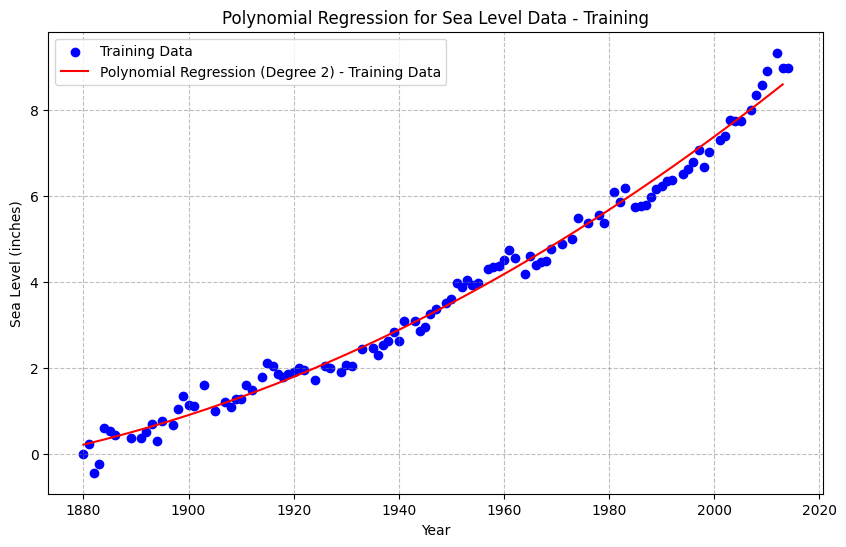

In [83]:
#polynomial regression line for the training data
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.plot(x_values_train, predicted_values_train, color='red', label='Polynomial Regression (Degree 2) - Training Data')
plt.xlabel('Year')
plt.ylabel('Sea Level (inches)')
plt.title('Polynomial Regression for Sea Level Data - Training')
plt.legend()
plt.grid(True, ls='--', color='grey', alpha=0.5)
plt.show()

In [84]:
x_values_test = np.linspace(1880, 2013, 100)[:, np.newaxis]
x_values_test_poly = poly.transform(x_values_test)
predicted_values_test = reg.predict(x_values_test_poly)

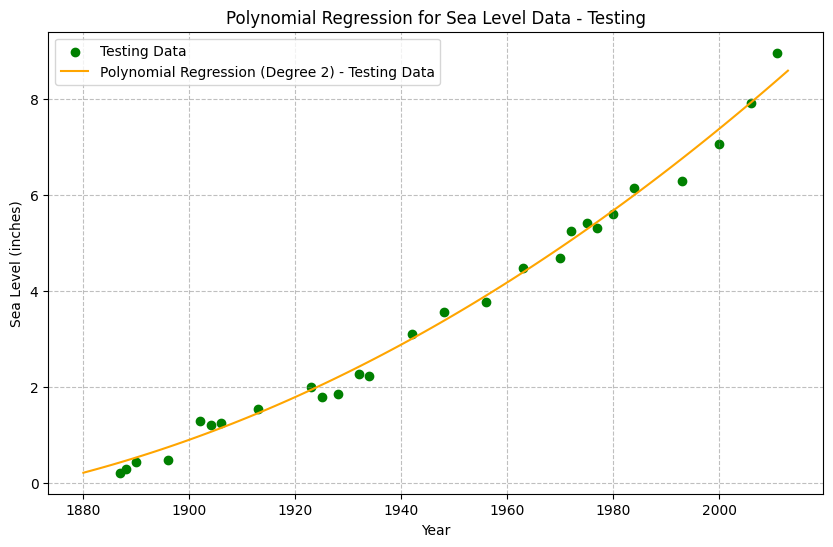

In [85]:
#polynomial regression line for the testing data
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='green', label='Testing Data')
plt.plot(x_values_test, predicted_values_test, color='orange', label='Polynomial Regression (Degree 2) - Testing Data')
plt.xlabel('Year')
plt.ylabel('Sea Level (inches)')
plt.title('Polynomial Regression for Sea Level Data - Testing')
plt.legend()
plt.grid(True, ls='--', color='grey', alpha=0.5)
plt.show()